In [2]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def gradient_desc(x,y,z):
    m_test = 0
    b_test = 0
    learn_rate = 0.0823
    iteration = 1000
    n = len(x)
    m = []
    b = []
    err_list = []
    for i in range(iteration):
        y_predicted = (m_test * x) + b_test
        error = (1/n) * sum(err**2 for err in (y - y_predicted))
        m.append(m_test)
        b.append(b_test)
        err_list.append(error)
        md = (2/n) * sum(-x * (y - y_predicted))
        bd = (2/n) * sum(-(y - y_predicted))
        m_test = m_test - (learn_rate * md)
        b_test = b_test - (learn_rate * bd)
        
    if z == 0: return m
    if z == 1: return b
    if z == 2: return err_list

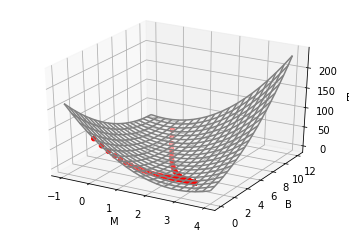

In [11]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

fig = plt.figure()
ax = plt.axes(projection="3d")

def e_function(m, b):
    error = 0
    for i in range(len(x)):
        error += ((y[i]- (m*x[i] + b) )**2)
    error = error / len(x)
    return error

m = np.linspace(-1,4, 20)
b = np.linspace(0,12, 20)


m, b = np.meshgrid(m, b)
e = e_function(m, b)

ax.set_xlabel('M')
ax.set_ylabel('B')
ax.set_zlabel('E')


b_line = gradient_desc(x,y,1)
m_line = gradient_desc(x,y,0)
z_line = gradient_desc(x,y,2)

ax.scatter3D(b_line, m_line, z_line, color='r', zorder = 0.5)

ax.plot_wireframe(m, b, e, color='grey', zorder=1)
